# K-Means with limited number of features and only 50 top genres

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

top_genres = pd.read_csv('top_genres_scored.csv', header = None)

top_genres.head()

,0,1
0,pop,1885.0
1,poprap,1864.0
2,hiphop,1557.0
3,rap,1511.0
4,southernhiphop,1196.0


In [2]:
top_genres.tail()

,0,1
70,alternativeemo,97.0
71,traplatino,94.0
72,tropical,93.0
73,indiepoprap,93.0
74,reggaerock,87.0


In [3]:
play_features = pd.read_csv('play_id_to_features.csv')
genre_names = pd.read_csv('all_genres.csv')

genre_names['PLAY_ID'] = genre_names['SPOTIFY_URL'].map(lambda s: s.split('playlist')[1][1:])

In [4]:
sub = genre_names[['GENRE','PLAY_ID']]

In [5]:
sub = sub.set_index('PLAY_ID')

In [6]:
play_features = play_features.set_index('Unnamed: 0')

In [7]:
# play_features['genre'] = sub
play_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
Unnamed: 0,,,,,,,,,,,,,
2JsqQdMbBC2hh7GjsEjKFg,0.222149,0.073075,4.38,-25.78303,0.66,0.041801,0.922340,0.899800,0.118957,0.095634,92.38971,3.60,backgroundmusic
2SoQc6bippmMyUTn1qditv,0.525410,0.645390,4.22,-9.24089,0.72,0.083043,0.468130,0.066672,0.282273,0.695130,119.71814,3.55,classicmoroccanpop
1KZMCWImik3vA17zVLJ3c3,0.213119,0.166708,5.39,-18.83644,0.56,0.039690,0.966740,0.210298,0.152561,0.144698,102.87562,3.69,orthodoxchant
1i9zTcQqWUBTgIuCgxDW3S,0.439940,0.348418,5.05,-12.84006,0.71,0.055323,0.896280,0.855150,0.141858,0.396229,107.26951,3.60,tar
0TcXdt4sbITbwCwwFbKYyd,0.789310,0.518160,5.14,-10.01960,0.53,0.133222,0.148952,0.111601,0.148528,0.736290,118.49993,4.00,reggae


In [8]:
(play_features['danceability'] + play_features['valence'])/2

Unnamed: 0
2JsqQdMbBC2hh7GjsEjKFg    0.158891
2SoQc6bippmMyUTn1qditv    0.610270
1KZMCWImik3vA17zVLJ3c3    0.178908
1i9zTcQqWUBTgIuCgxDW3S    0.418085
0TcXdt4sbITbwCwwFbKYyd    0.762800
                            ...   
5kAulE1JAusA4SlfP0OjYG    0.231457
42dGKCvDkq9aLYNzKwatSu    0.669026
4hdX1gS6iDhWw0ll0VBBxU    0.509804
69AS6y3vT3IRvzBiPwvqP9    0.213247
02OGpAADCHQbMhxilfo320    0.566797
Length: 3652, dtype: float64

In [9]:
play_features.to_csv('top_playlists_with_features.csv')

In [10]:
play_features = play_features.set_index('genre')

In [11]:
play_features = play_features.loc[top_genres[0].values]

In [12]:
play_features['dance_valence'] = (play_features['danceability'] + play_features['valence'])/2
play_features['loudness'] = (play_features['loudness'] - play_features['loudness'].mean())/play_features['loudness'].std()
play_features['key'] = (play_features['key'] - play_features['key'].mean())/play_features['key'].std()
play_features['tempo'] = (play_features['tempo'] - play_features['tempo'].mean())/play_features['tempo'].std()

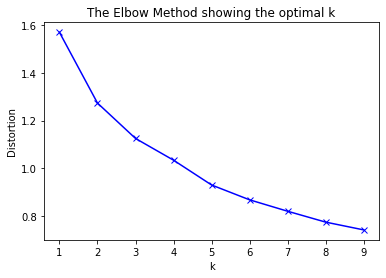

In [13]:
# https://pythonprogramminglanguage.com/kmeans-elbow-method/
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

X = play_features[['dance_valence', 'key', 'loudness','tempo','energy']].to_numpy()

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('K-means-elbow.png')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [19]:
sample = play_features.copy()
sample['cluster'] = kmeans.labels_

In [20]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline
import matplotlib.pyplot as plt

def plot_3d(f1, f2, f3, sample, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = sample[f1]
    ys = sample[f2]
    zs = sample[f3]

    ax.scatter(xs, ys, zs, color = colors)

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_zlabel(f3)

    plt.show()

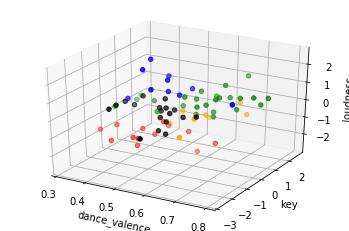

In [21]:
import matplotlib.pyplot as plt
color_map = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'orange',
    4: 'black',
    5: 'yellow',
    6: 'pink'
}
colors = sample['cluster'].map(color_map)
# 'dance_valence', 'key', 'loudness','tempo','energy']
plot_3d('dance_valence', 'key', 'loudness', sample, colors)

In [22]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [23]:
sample = play_features.copy()
sample['cluster'] = kmeans.labels_

In [24]:
sample[sample['cluster'] == 0]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
southernhiphop,0.759840,0.671800,0.715167,0.639746,0.560000,0.194384,0.088992,0.000287,0.180445,0.541636,0.643147,3.980000,0.650738,0
electropop,0.660160,0.627720,0.715167,0.337683,0.560000,0.070607,0.222024,0.037668,0.152950,0.490414,-0.037223,4.040000,0.575287,0
countryroad,0.582900,0.706740,0.937982,0.691418,0.940000,0.043092,0.211440,0.000269,0.178728,0.577140,1.219335,3.940000,0.580020,0
dancepop,0.694240,0.734120,1.355760,1.008751,0.560000,0.074673,0.113860,0.013701,0.165191,0.584726,-0.222651,3.970000,0.639483,0
anthemworship,0.434310,0.532010,1.578575,-0.571704,0.910000,0.041484,0.292087,0.007803,0.196804,0.246033,0.091461,3.870000,0.340171,0
worship,0.437570,0.557394,0.798723,-0.370421,0.920000,0.039845,0.274097,0.001916,0.211811,0.297648,0.417400,3.830000,0.367609,0
texascountry,0.545760,0.619401,0.687316,-0.166720,0.910000,0.036858,0.249212,0.012309,0.218291,0.518190,0.387043,3.980000,0.531975,0
corrido,0.726470,0.696500,1.021538,0.909034,0.850000,0.077669,0.379734,0.000038,0.187720,0.861710,-0.039690,3.260000,0.794090,0
rb,0.685010,0.575890,0.826575,-0.298937,0.390000,0.095765,0.225102,0.003320,0.133800,0.568480,-0.100913,3.950000,0.626745,0


In [25]:
sample[sample['cluster'] == 1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
hiphop,0.76365,0.684380,1.244353,-0.356096,0.42,0.245931,0.132631,0.002554,0.198494,0.669080,-2.592718,4.01,0.716365,1
alternativerb,0.64157,0.493010,-0.259647,-0.705077,0.48,0.118080,0.354245,0.023717,0.144984,0.429175,-1.468305,3.93,0.535373,1
indierb,0.66394,0.459320,1.132945,-0.888972,0.41,0.110102,0.357165,0.023575,0.135249,0.438332,-1.730661,3.92,0.551136,1
deeppoprb,0.66268,0.542110,0.325242,-0.216537,0.40,0.125165,0.243836,0.000324,0.165555,0.435744,-1.142561,3.98,0.549212,1
westcoasttrap,0.75995,0.635440,-0.510314,-0.022319,0.49,0.224434,0.098431,0.000121,0.179969,0.497640,-2.657772,3.99,0.628795,1
calirap,0.77257,0.618210,0.380945,-0.258274,0.48,0.222463,0.180463,0.000111,0.159480,0.473539,-2.393579,4.00,0.623055,1
urbancontemporary,0.68198,0.581360,0.603760,-0.430866,0.39,0.084929,0.215330,0.002888,0.138607,0.591870,-0.566643,3.97,0.636925,1
gangsterrap,0.77904,0.697410,1.244353,0.248523,0.49,0.225000,0.098908,0.002671,0.197541,0.609590,-1.358647,4.01,0.694315,1
indiesoul,0.69188,0.505611,1.522871,-1.102439,0.48,0.083760,0.381248,0.217475,0.133954,0.464643,-1.445080,3.95,0.578261,1


In [26]:
sample[sample['cluster'] == 2]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
folkpop,0.55408,0.421952,-0.064684,-1.633684,0.85,0.038942,0.572482,0.053243,0.146550,0.394269,-0.615321,3.88,0.474174,2
christianuplift,0.48268,0.486524,-0.454610,-1.228142,0.88,0.035364,0.389759,0.049490,0.157419,0.247431,0.136931,3.89,0.365056,2
outlawcountry,0.55009,0.511072,0.603760,-1.546249,0.84,0.038350,0.406812,0.024467,0.186434,0.559870,-0.788221,3.93,0.554980,2
chamberpop,0.52605,0.492893,0.882279,-1.614876,0.73,0.041229,0.495957,0.146008,0.136113,0.418207,-0.680602,3.93,0.472129,2
artpop,0.53354,0.528315,-0.203943,-1.338927,0.58,0.043813,0.328259,0.191520,0.159315,0.347605,-0.241266,3.95,0.440573,2
vaporsoul,0.63222,0.531290,0.130279,-0.933907,0.53,0.073544,0.362814,0.133144,0.141398,0.355442,-0.913380,3.95,0.493831,2
countryrock,0.55693,0.484685,0.743019,-2.717242,0.94,0.038283,0.404319,0.031303,0.153336,0.598889,-0.549334,3.97,0.577910,2
soul,0.61495,0.536550,0.464501,-1.839621,0.67,0.053966,0.389630,0.042886,0.158670,0.688843,-0.299868,3.92,0.651897,2


In [27]:
sample[sample['cluster'] == 3]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
popedm,0.58980,0.74095,-2.459943,1.214236,0.53,0.065612,0.143328,0.018415,0.201176,0.362658,0.502803,4.01,0.476229,3
escaperoom,0.68710,0.63107,-2.738461,-0.204149,0.65,0.130913,0.195704,0.116585,0.195023,0.448827,0.276936,3.97,0.567963,3
alternativeemo,0.44888,0.76179,-2.097869,0.679529,0.79,0.061442,0.092849,0.063798,0.187923,0.415649,1.235607,3.97,0.432265,3


In [28]:
sample[sample['cluster'] == 4]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
pop,0.646260,0.622910,-0.036832,0.806435,0.66,0.086982,0.226059,0.002211,0.152532,0.501731,-0.690193,3.96,0.573996,4
poprap,0.756290,0.607630,-0.008980,0.353675,0.54,0.187661,0.161173,0.001188,0.165433,0.469726,0.550964,4.00,0.613008,4
rap,0.771600,0.622500,0.269538,0.375159,0.58,0.192807,0.142510,0.001689,0.163494,0.486566,0.715425,4.01,0.629083,4
indiepoptimism,0.616420,0.645740,-0.482462,0.284403,0.70,0.061888,0.199000,0.017869,0.170117,0.453478,-0.174883,4.01,0.534949,4
country,0.603600,0.643420,0.297390,-0.264594,0.95,0.041830,0.241450,0.000201,0.156768,0.586830,0.566335,3.96,0.595215,4
indiepop,0.603470,0.681580,-0.928091,0.307279,0.75,0.042584,0.165851,0.038848,0.165103,0.536920,-0.205560,3.95,0.570195,4
countrypop,0.562900,0.661430,-0.287499,0.670444,0.87,0.043739,0.239203,0.000418,0.149741,0.481332,0.643862,3.97,0.522116,4
ccm,0.484990,0.630130,-0.760980,0.414954,0.83,0.041671,0.210991,0.001908,0.189548,0.340748,-0.038789,3.89,0.412869,4
vaportrap,0.754580,0.558230,-1.318017,-0.639614,0.54,0.212926,0.161462,0.001800,0.165777,0.397804,1.545490,4.00,0.576192,4


In [29]:
sample[sample['cluster'] == 5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
modernrock,0.54941,0.77736,-0.287499,1.108193,0.72,0.056648,0.067450,0.035907,0.192436,0.515872,0.950440,3.95,0.532641,5
moderncountryrock,0.57386,0.70960,0.631612,0.935694,0.88,0.045150,0.175597,0.000276,0.176400,0.557520,1.793701,3.93,0.565690,5
contemporarycountry,0.57639,0.71481,-0.287499,1.021404,0.90,0.045489,0.191860,0.000484,0.152309,0.563090,0.874118,3.97,0.569740,5
edm,0.63440,0.82290,-1.150906,1.581939,0.45,0.072478,0.061799,0.148906,0.200975,0.407467,0.736262,3.96,0.520933,5
electrohouse,0.67859,0.85152,-0.315351,1.750235,0.58,0.092020,0.043978,0.222365,0.230274,0.385092,1.056638,4.00,0.531841,5
electronictrap,0.62770,0.79381,0.715167,1.362140,0.52,0.125423,0.066618,0.171124,0.223206,0.337975,1.573923,3.99,0.482838,5
brostep,0.60483,0.88351,-0.733128,2.333170,0.57,0.142058,0.035335,0.134535,0.268069,0.339570,1.193494,3.98,0.472200,5
regionalmexicanpop,0.70251,0.62192,-0.844536,1.373537,0.84,0.046897,0.438426,0.003357,0.150630,0.831690,1.389721,3.38,0.767100,5
zapstep,0.59569,0.89502,-0.008980,2.547910,0.58,0.151893,0.028223,0.161166,0.274931,0.325129,1.012856,3.96,0.460409,5


In [30]:
sample[sample['cluster'] == 6]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence,cluster
genre,,,,,,,,,,,,,,
undergroundhiphop,0.731650,0.585400,-1.178758,-0.622684,0.65,0.191798,0.193008,0.015954,0.211579,0.358806,0.216171,3.94,0.545228,6
indiecoustica,0.559640,0.451426,-1.095202,-1.346644,0.92,0.040760,0.503060,0.012516,0.142478,0.351032,-0.459851,3.96,0.455336,6
indiefolk,0.534020,0.431291,-0.983795,-1.849216,0.85,0.037878,0.630898,0.084814,0.144655,0.392510,-1.213852,3.92,0.463265,6
stompandholler,0.544970,0.516279,-1.485128,-1.082867,0.87,0.039390,0.459705,0.116787,0.144037,0.441863,-0.671883,3.94,0.493416,6
hyphy,0.761260,0.628820,-1.930758,-0.257112,0.49,0.217575,0.094074,0.000154,0.186419,0.546590,-2.264380,3.97,0.653925,6
deepccm,0.422335,0.449633,-0.677425,-1.532505,0.89,0.041421,0.460327,0.081514,0.172446,0.215899,-0.105747,3.81,0.319117,6
rootsworship,0.479610,0.406530,-1.429425,-1.538028,0.89,0.041491,0.516742,0.005380,0.170358,0.318027,-0.578313,3.70,0.398818,6
rootsamericana,0.557470,0.567440,-0.788832,-0.299060,0.90,0.037345,0.334487,0.020860,0.162132,0.544725,-0.626196,3.83,0.551098,6


In [46]:
genre_cluster_map_means = {}
for i in range(7):
    genre_cluster_map_means[i] = set(sample[sample['cluster'] == i].index.values)

In [31]:
louv = pd.read_csv('genre_louv_cat.csv', header = None)
louv.head()

,0,1
0,pop,0
1,indiepoptimism,1
2,hiphop,0
3,tropical,2
4,electrohouse,3


In [48]:
# louv = pd.Series(genre_cluster_map_louv)
means = pd.Series(genre_cluster_map_means)

# pd.DataFrame([louv,means], columns = ['Louv','Means'])

In [86]:
louv

0    {vaportrap, urbancontemporary, pop, gangsterra...
1    {artpop, indietronica, vaporsoul, modernrock, ...
2    {latin, latinhiphop, regionalmexicanpop, tropi...
3    {popedm, electronictrap, brostep, edm, zapstep...
4                                {alternativeemo, emo}
5    {contemporarycountry, countryrock, rootsameric...
6    {worldworship, christianmusic, worship, christ...
dtype: object

In [87]:
louv[0]

{'atlhiphop',
 'calirap',
 'dancepop',
 'deeppoprb',
 'dirtysouthrap',
 'gangsterrap',
 'hiphop',
 'hyphy',
 'indiepoprap',
 'melodicrap',
 'pop',
 'poprap',
 'rap',
 'rb',
 'reggaerock',
 'soul',
 'southernhiphop',
 'undergroundhiphop',
 'urbancontemporary',
 'vaportrap',
 'westcoasttrap'}

In [88]:
louv[1]

{'alternativerb',
 'artpop',
 'chamberpop',
 'electropop',
 'escaperoom',
 'folkpop',
 'indiefolk',
 'indiegaragerock',
 'indiepop',
 'indiepoptimism',
 'indierb',
 'indierock',
 'indiesoul',
 'indietronica',
 'modernrock',
 'stompandholler',
 'vaporsoul'}

In [89]:
louv[2]

{'corrido',
 'latin',
 'latinhiphop',
 'norteno',
 'regionalmexicanpop',
 'traplatino',
 'tropical'}

In [90]:
louv[3]

{'brostep',
 'edm',
 'electrohouse',
 'electronictrap',
 'popedm',
 'vaportwitch',
 'zapstep'}

In [91]:
louv[4]

{'alternativeemo', 'emo'}

In [92]:
louv[5]

{'contemporarycountry',
 'country',
 'countrypop',
 'countryroad',
 'countryrock',
 'moderncountryrock',
 'outlawcountry',
 'reddirt',
 'rootsamericana',
 'texascountry'}

In [93]:
louv[6]

{'anthemworship',
 'ccm',
 'christianalternativerock',
 'christianmusic',
 'christianpop',
 'christianuplift',
 'deepccm',
 'indiecoustica',
 'rootsworship',
 'worldworship',
 'worship'}

In [49]:
for i in range(7):
    print(means[i])

{'corrido', 'indiepoprap', 'latin', 'dancepop', 'rb', 'texascountry', 'traplatino', 'reggaerock', 'anthemworship', 'dirtysouthrap', 'norteno', 'tropical', 'latinhiphop', 'countryroad', 'southernhiphop', 'electropop', 'worship'}
{'calirap', 'gangsterrap', 'urbancontemporary', 'indiesoul', 'hiphop', 'westcoasttrap', 'deeppoprb', 'alternativerb', 'indierb'}
{'soul', 'folkpop', 'countryrock', 'outlawcountry', 'christianuplift', 'vaporsoul', 'chamberpop', 'artpop'}
{'popedm', 'escaperoom', 'alternativeemo'}
{'indiepop', 'christianalternativerock', 'vaportwitch', 'indierock', 'rap', 'indiepoptimism', 'countrypop', 'indiegaragerock', 'country', 'christianmusic', 'melodicrap', 'vaportrap', 'worldworship', 'poprap', 'indietronica', 'reddirt', 'christianpop', 'ccm', 'pop', 'atlhiphop'}
{'moderncountryrock', 'zapstep', 'contemporarycountry', 'edm', 'electrohouse', 'regionalmexicanpop', 'emo', 'modernrock', 'electronictrap', 'brostep'}
{'undergroundhiphop', 'indiefolk', 'rootsworship', 'hyphy', 'r

In [99]:
play_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence
genre,,,,,,,,,,,,,
pop,0.64626,0.62291,-0.036832,0.806435,0.66,0.086982,0.226059,0.002211,0.152532,0.501731,-0.690193,3.96,0.573996
poprap,0.75629,0.60763,-0.008980,0.353675,0.54,0.187661,0.161173,0.001188,0.165433,0.469726,0.550964,4.00,0.613008
hiphop,0.76365,0.68438,1.244353,-0.356096,0.42,0.245931,0.132631,0.002554,0.198494,0.669080,-2.592718,4.01,0.716365
rap,0.77160,0.62250,0.269538,0.375159,0.58,0.192807,0.142510,0.001689,0.163494,0.486566,0.715425,4.01,0.629083
southernhiphop,0.75984,0.67180,0.715167,0.639746,0.56,0.194384,0.088992,0.000287,0.180445,0.541636,0.643147,3.98,0.650738


In [42]:
odd1 = ['regionalmexicanpop','emo','contemporarycountry']
odd2 = ['edm','popedm','electropop']
play_features.loc[odd1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,dance_valence
genre,,,,,,,,,,,,,
regionalmexicanpop,0.70251,0.62192,-0.844536,1.373537,0.84,0.046897,0.438426,0.003357,0.150630,0.831690,1.389721,3.38,0.767100
emo,0.42117,0.79137,-0.677425,0.558250,0.72,0.057197,0.053654,0.089558,0.188816,0.414883,2.157818,3.98,0.418026
contemporarycountry,0.57639,0.71481,-0.287499,1.021404,0.90,0.045489,0.191860,0.000484,0.152309,0.563090,0.874118,3.97,0.569740


In [50]:
odd3 = ['undergroundhiphop', 'indiefolk', 'rootsworship']

In [53]:
import plotly.graph_objects as go

features = ['energy','loudness', 'mode', 'key',
            'acousticness', 'instrumentalness','dance_valence']

fig = go.Figure()

top_genres = odd2
print(top_genres)
for genre in top_genres:
    g_feat = play_features[features].loc[genre]
    print(g_feat)
    fig.add_trace(go.Scatterpolar(
          r=g_feat,
          theta=features,
          fill='toself',
          name=genre
    ))

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0, 5]
#     )),
#   showlegend=False
# )
fig.write_image("odd3_radar_map.png")
fig.show()

['edm', 'popedm', 'electropop']
energy              0.822900
loudness            1.581939
mode                0.450000
key                -1.150906
acousticness        0.061799
instrumentalness    0.148906
dance_valence       0.520933
Name: edm, dtype: float64
energy              0.740950
loudness            1.214236
mode                0.530000
key                -2.459943
acousticness        0.143328
instrumentalness    0.018415
dance_valence       0.476229
Name: popedm, dtype: float64
energy              0.627720
loudness            0.337683
mode                0.560000
key                 0.715167
acousticness        0.222024
instrumentalness    0.037668
dance_valence       0.575287
Name: electropop, dtype: float64
